In [1]:
periodo = 'pre-pandemia'

# Importe as bibliotecas necessárias

In [2]:
%matplotlib inline
from warnings import filterwarnings

from IPython.display import clear_output
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.neural_network._multilayer_perceptron import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree._classes import DecisionTreeClassifier
import multiprocessing
import unidecode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
filterwarnings('ignore')
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
np.random.seed(42)
tf.random.set_seed(42)

n_jobs = multiprocessing.cpu_count() - 1

In [3]:
def avaliacao(y_val, predicao):
    '''
    Computa as mericas de avaliação dos clasficadores
    '''
        
    precisao = precision_score(y_val, predicao) * 100
    revocacao = recall_score(y_val, predicao) * 100
    f1score = f1_score(y_val, predicao) * 100
    acuracia = accuracy_score(y_val, predicao) * 100
    print('precisao {:.2f}'.format(precisao))
    print('revocacao {:.2f}'.format(revocacao))
    print('f1-score {:.2f}'.format(f1score))
    print('acuracia {:.2f}'.format(acuracia))
    print()

def plotarMatrizConfusao(y_val, predicao, nome_classificador, label_encoder, periodo):
    cm = confusion_matrix(y_val,predicao)

    # Normalizar a matriz de confusão para ter percentagens
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Configurar o estilo do seaborn
    sns.set(font_scale=1.2)
    
    # Plotar a matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=label_encoder.classes_)
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.title(f'Matriz de confusão {nome_classificador} - {periodo}', fontdict={'color':'black', 'weight':'bold'})
    disp.plot(cmap='coolwarm', ax=ax, values_format='.2f', text_kw={'color':'black', 'weight':'bold'})
    ax.grid(False)

    #sns.heatmap(cm, cmap='coolwarm', annot=True,
                #xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
    #            )
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.savefig(f'matrizes_confusao/matrizConfusao_{unidecode.unidecode(nome_classificador.replace(" ", "_")).lower()}_{periodo}')
    plt.show()
    plt.close()
    
def modeloML(model, x_train, y_train, x_val, y_val, cv, name, label_encoder, periodo):
    
    print(name)
    model.fit(x_train, y_train)
    predicao = cross_val_predict(model, x_val, y_val, cv=cv)
    avaliacao(y_val, predicao)
    
    plotarMatrizConfusao(y_val, predicao, name, label_encoder, periodo)


In [4]:

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

choq = ['volumeTweets_media', 'volumeTweets_variancia', 'volumeTweets_mediaMovelPonterada', 'volumeTweets_entropia', 
 'indiceInsonia_mediaMovelPonterada', 'indiceInsonia_entropia', 
 'pronome1Pessoa_media', 'pronome1Pessoa_variancia', 'pronome1Pessoa_mediaMovelPonterada', 'pronome1Pessoa_entropia', 
 'pronome2Pessoa_mediaMovelPonterada', 
 'pronome3Pessoa_variancia', 'pronome3Pessoa_mediaMovelPonterada', 'pronome3Pessoa_entropia', 
 'valencia_variancia', 'valencia_entropia', 
 'ativacao_variancia', 'ativacao_entropia', 
 'termosDepressivos_mediaMovelPonterada', 
 'grafoSocial_variancia', 'grafoSocial_mediaMovelPonterada', 'grafoSocial_entropia',
 'medicamentosAntiDepressivo_variancia'
 ]


atributos_anterioes = ['caracteresOrientais_variancia', 
 'emojis_mediaMovelPonterada', 
 'curtidas_media', 'curtidas_variancia', 'curtidas_mediaMovelPonterada',
 'midia_variancia',
 'links_entropia',
 ]

atributos_novos = ['hashtags_variancia', 'hashtags_mediaMovelPonterada', 
                   'retweets_media', 'retweets_variancia', 'retweets_mediaMovelPonterada', 
 'mencoes_media', 'mencoes_variancia', 'mencoes_mediaMovelPonterada', 
 'polaridade_entropia', 
 'subjetividade_entropia']




In [5]:
df = pd.read_csv(f'datasets/twitterbase_{periodo}.csv', sep=';')
label_encoder = LabelEncoder()
df['classe'] = label_encoder.fit_transform(df['classe']).astype('float64')

cv = KFold(n_splits=10, shuffle=True, random_state=42)
zscore = StandardScaler()

x = df.drop('classe', axis=1).copy()
y = df['classe'].copy()
x = zscore.fit_transform(x)


Floresta Randômica
precisao 74.37
revocacao 86.67
f1-score 80.05
acuracia 77.06



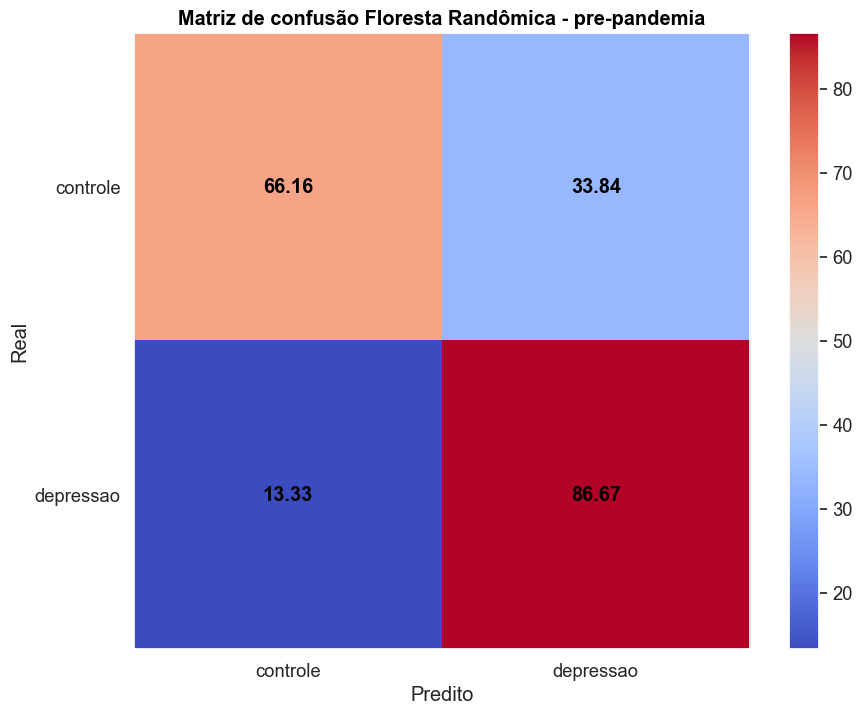

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=validation_ratio, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=test_ratio, random_state=42)

florestaRandomica = RandomForestClassifier(random_state=42, verbose=0, n_jobs=n_jobs, max_depth=10, criterion='gini', n_estimators=50)
modeloML(florestaRandomica, x_train, y_train, x_test, y_test, cv, 'Floresta Randômica', label_encoder, periodo)

# Pandemia

In [7]:
periodo = 'pandemia'

In [8]:

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

choq = ['volumeTweets_media', 'volumeTweets_variancia', 'volumeTweets_mediaMovelPonterada', 'volumeTweets_entropia', 
'indiceInsonia_variancia', 'indiceInsonia_mediaMovelPonterada', 'indiceInsonia_entropia', 
'pronome1Pessoa_media', 'pronome1Pessoa_variancia', 'pronome1Pessoa_mediaMovelPonterada', 'pronome1Pessoa_entropia', 
'pronome2Pessoa_mediaMovelPonterada', 
'pronome3Pessoa_media', 'pronome3Pessoa_variancia', 'pronome3Pessoa_mediaMovelPonterada', 'pronome3Pessoa_entropia', 
'valencia_mediaMovelPonterada', 'valencia_entropia', 
'ativacao_mediaMovelPonterada', 'ativacao_entropia', 
'termosDepressivos_variancia', 
'grafoSocial_variancia', 'grafoSocial_mediaMovelPonterada', 'grafoSocial_entropia',
'medicamentosAntiDepressivo_mediaMovelPonterada'
]


atributos_anterioes = ['caracteresOrientais_variancia', 
'emojis_variancia', 
'midia_variancia', 'midia_mediaMovelPonterada', 
'curtidas_media', 'curtidas_variancia', 'curtidas_mediaMovelPonterada',
'links_mediaMovelPonterada'
]

atributos_novos = ['hashtags_variancia', 'hashtags_mediaMovelPonterada', 
'retweets_variancia', 
'mencoes_variancia', 'mencoes_mediaMovelPonterada', 
'polaridade_entropia', 
'subjetividade_entropia'
]

In [9]:
df = pd.read_csv(f'datasets/twitterbase_{periodo}.csv', sep=';')
label_encoder = LabelEncoder()
df['classe'] = label_encoder.fit_transform(df['classe']).astype('float64')

cv = KFold(n_splits=10, shuffle=True, random_state=42)
zscore = StandardScaler()

x = df.drop('classe', axis=1).copy()
y = df['classe'].copy()
x = zscore.fit_transform(x)

Floresta Randômica
precisao 73.28
revocacao 85.83
f1-score 79.06
acuracia 76.01



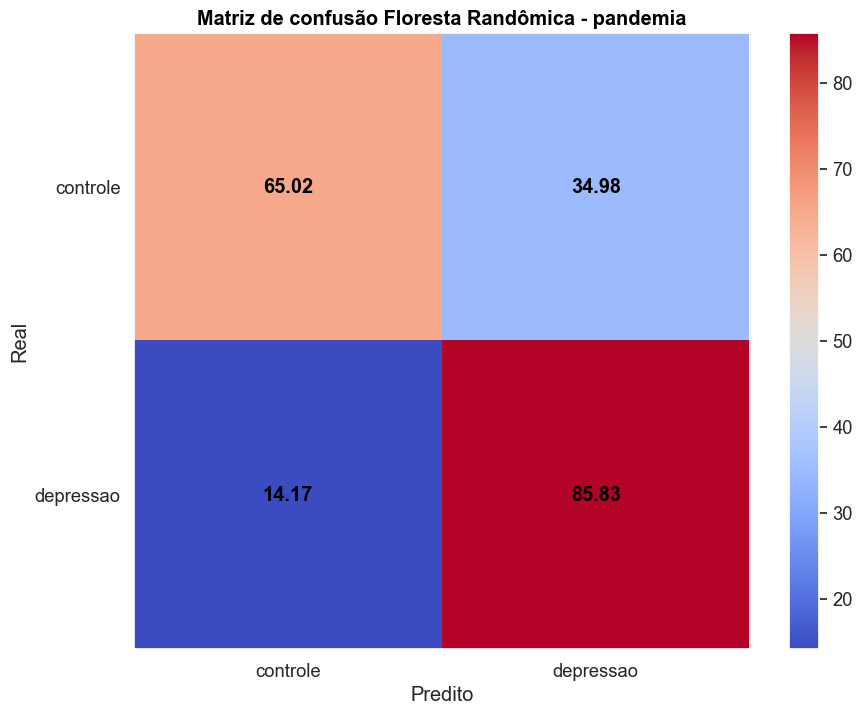

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=validation_ratio, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=test_ratio, random_state=42)

florestaRandomica = RandomForestClassifier(random_state=42, verbose=0, n_jobs=n_jobs, max_depth=10, criterion='gini', n_estimators=50)
modeloML(florestaRandomica, x_train, y_train, x_test, y_test, cv, 'Floresta Randômica', label_encoder, periodo)